## Importing Libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [144]:
data=pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [145]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [146]:
#Converting the categorical columns into numeric
object_cols = data.loc[:, data.dtypes == object].columns

for col in object_cols:
    data[col] = data[col].astype('category')
    
numeric_cols = list(data.loc[:, data.dtypes == "int64"].columns)
cat_cols = list(data.loc[:, data.dtypes == "category"].columns)

data["Attrition_num"] = pd.factorize(data["Attrition"])[0]

In [147]:
numeric_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [148]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [149]:
data.Attrition_num.value_counts()

1    1233
0     237
Name: Attrition_num, dtype: int64

In [152]:
for col in numeric_cols:
    display(data[[col, "Attrition"]].groupby("Attrition").mean())

,Age
Attrition,
No,37.561233
Yes,33.607595


,DailyRate
Attrition,
No,812.504461
Yes,750.362869


,DistanceFromHome
Attrition,
No,8.915653
Yes,10.632911


,Education
Attrition,
No,2.927007
Yes,2.839662


,EmployeeCount
Attrition,
No,1
Yes,1


,EmployeeNumber
Attrition,
No,1027.656123
Yes,1010.345992


,EnvironmentSatisfaction
Attrition,
No,2.771290
Yes,2.464135


,HourlyRate
Attrition,
No,65.952149
Yes,65.573840


,JobInvolvement
Attrition,
No,2.770479
Yes,2.518987


,JobLevel
Attrition,
No,2.145985
Yes,1.637131


,JobSatisfaction
Attrition,
No,2.778589
Yes,2.468354


,MonthlyIncome
Attrition,
No,6832.739659
Yes,4787.092827


,MonthlyRate
Attrition,
No,14265.779400
Yes,14559.308017


,NumCompaniesWorked
Attrition,
No,2.645580
Yes,2.940928


,PercentSalaryHike
Attrition,
No,15.231144
Yes,15.097046


,PerformanceRating
Attrition,
No,3.153285
Yes,3.156118


,RelationshipSatisfaction
Attrition,
No,2.733982
Yes,2.599156


,StandardHours
Attrition,
No,80
Yes,80


,StockOptionLevel
Attrition,
No,0.845093
Yes,0.527426


,TotalWorkingYears
Attrition,
No,11.862936
Yes,8.244726


,TrainingTimesLastYear
Attrition,
No,2.832928
Yes,2.624473


,WorkLifeBalance
Attrition,
No,2.781022
Yes,2.658228


,YearsAtCompany
Attrition,
No,7.369019
Yes,5.130802


,YearsInCurrentRole
Attrition,
No,4.484185
Yes,2.902954


,YearsSinceLastPromotion
Attrition,
No,2.234388
Yes,1.945148


,YearsWithCurrManager
Attrition,
No,4.367397
Yes,2.852321


In [153]:
for col in cat_cols:
    display(data[[col, "Attrition_num"]].groupby(col).mean())

,Attrition_num
Attrition,
No,1
Yes,0


,Attrition_num
BusinessTravel,
Non-Travel,0.920000
Travel_Frequently,0.750903
Travel_Rarely,0.850431


,Attrition_num
Department,
Human Resources,0.809524
Research & Development,0.861602
Sales,0.793722


,Attrition_num
EducationField,
Human Resources,0.740741
Life Sciences,0.853135
Marketing,0.779874
Medical,0.864224
Other,0.865854
Technical Degree,0.757576


,Attrition_num
Gender,
Female,0.852041
Male,0.829932


,Attrition_num
JobRole,
Healthcare Representative,0.931298
Human Resources,0.769231
Laboratory Technician,0.760618
Manager,0.950980
Manufacturing Director,0.931034
Research Director,0.975000
Research Scientist,0.839041
Sales Executive,0.825153
Sales Representative,0.602410


,Attrition_num
MaritalStatus,
Divorced,0.899083
Married,0.875186
Single,0.744681


,Attrition_num
Over18,
Y,0.838776


,Attrition_num
OverTime,
No,0.895636
Yes,0.694712


In [157]:
data = data.drop(columns=["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"])

Text(0, 0.5, 'Attrition %')

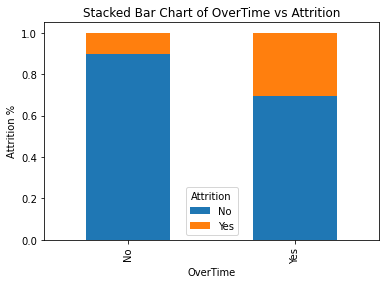

In [162]:
table=pd.crosstab(data.OverTime, data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of OverTime vs Attrition')
plt.xlabel('OverTime')
plt.ylabel('Attrition %')

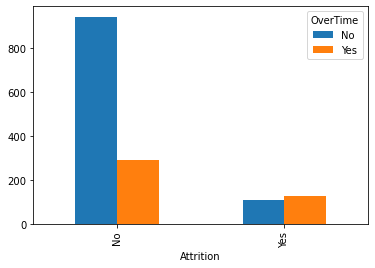

In [158]:
pd.crosstab(data.Attrition, data.OverTime).plot(kind='bar')

In [ ]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

In [34]:
feature_cols = ['Age', 'BusinessTravel', 'Education']

x = data[feature_cols] # Features
y = data.Attrition # Target variable

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [36]:
# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
model.fit(x_train,y_train)

#
y_pred = model.predict(x_test)

In [ ]:
`

In [37]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0,  58],
       [  0, 310]], dtype=int64)

In [40]:
data.Attrition.describe()

count    1470.000000
mean        0.838776
std         0.367863
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Attrition, dtype: float64

Text(0.5, 257.44, 'Predicted label')

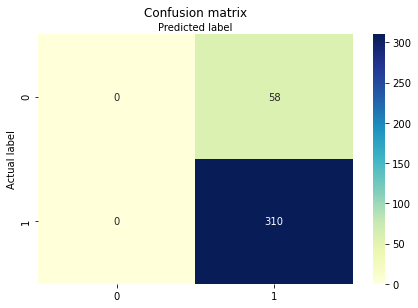

In [38]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')